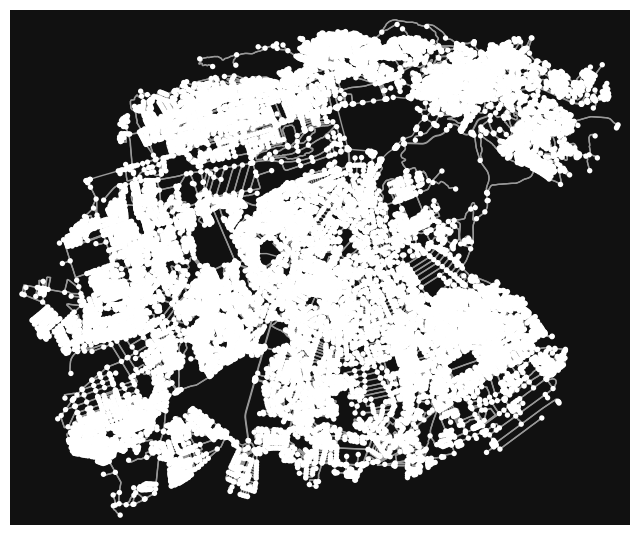

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
import osmnx as ox
import networkx as nx

place_name = "Fes, Morocco"
graph = ox.graph_from_place(place_name, network_type='all')
# Afficher le graphique
ox.plot_graph(ox.project_graph(graph))

In [ ]:
# Afficher le nombre de nœuds dans le graphique
num_nodes = len(graph)
print(f"Number of nodes in the graph: {num_nodes}")

Number of nodes in the graph: 22034


In [ ]:
# Obtenir le GeoDataFrame des nœuds
nodes_gdf = ox.graph_to_gdfs(graph, edges=False)

# Accéder aux colonnes de latitude et de longitude
latitudes = nodes_gdf['y']
longitudes = nodes_gdf['x']

coords=[]

# Stocker les coordonnées des nœuds dans la liste coords
for lat, lon in zip(latitudes, longitudes):
    coords.append((lat,lon))
coords


[(33.9900868, -5.0432012),
 (33.9904497, -5.0439276),
 (34.0081495, -5.0458045),
 (34.0091105, -5.0460038),
 (34.0253705, -5.0558554),
 (34.0171977, -5.0190679),
 (34.0594364, -4.9645373),
 (34.0586337, -4.966634),
 (34.0313163, -5.0133611),
 (34.0133422, -4.9967153),
 (34.007702, -5.0540864),
 (34.0065264, -5.0573668),
 (34.0203353, -4.974938),
 (34.0202517, -4.9813055),
 (34.0125496, -4.9736222),
 (34.0200014, -4.9749313),
 (34.0191134, -4.9730367),
 (34.0183316, -4.9728856),
 (34.0170142, -4.9716578),
 (34.0170542, -4.9740673),
 (34.018908, -4.9763145),
 (34.0183447, -4.9756029),
 (34.0161705, -4.9756196),
 (34.0180378, -4.981506),
 (34.0205839, -4.9839632),
 (34.0207204, -4.9836304),
 (34.0203435, -4.9812975),
 (34.0145545, -4.9720647),
 (34.0134618, -4.975287),
 (34.013822, -4.9746377),
 (34.0141855, -4.9740025),
 (34.0153354, -4.9759453),
 (34.0150068, -4.9765478),
 (34.0142618, -4.9778721),
 (34.0129838, -4.9761191),
 (34.0134832, -4.9809338),
 (34.010056, -4.9783256),
 (34.0107

In [ ]:
import osmnx as ox
import numpy as np
from scipy.spatial.distance import cdist

nodes_gdf = ox.graph_to_gdfs(graph, edges=False)
# Accéder aux colonnes de latitude et de longitude
latitudes = nodes_gdf['y']
longitudes = nodes_gdf['x']
# Créer une liste de coordonnées à partir des colonnes de latitude et de longitude
coords = list(zip(latitudes, longitudes))
# Créer une matrice d'adjacence basée sur la distance euclidienne
distance_matrix = cdist(coords, coords, metric='euclidean')
# Afficher la matrice d'adjacence avec les distances réelles
print("Distance Matrix:")
print(distance_matrix)
len(distance_matrix)

Distance Matrix:
[[0.         0.00081201 0.01824934 ... 0.05751615 0.05750583 0.05924096]
 [0.00081201 0.         0.01779904 ... 0.05724249 0.05723558 0.05899093]
 [0.01824934 0.01779904 0.         ... 0.04012885 0.04014827 0.04205604]
 ...
 [0.05751615 0.05724249 0.04012885 ... 0.         0.00025569 0.00249463]
 [0.05750583 0.05723558 0.04014827 ... 0.00025569 0.         0.00232188]
 [0.05924096 0.05899093 0.04205604 ... 0.00249463 0.00232188 0.        ]]


22034

In [ ]:
import numpy as np

def floyd_warshall(matrix):
    num_vertices = len(matrix)

    # Check if the matrix is valid (all rows have the same length)
    if any(len(row) != num_vertices for row in matrix):
        raise ValueError("Invalid matrix. All rows must have the same length.")

    # Copy the existing matrix to work with
    dist = [row[:] for row in matrix]

    # Apply Floyd-Warshall algorithm
    for k in range(num_vertices):
        for i in range(num_vertices):
            for j in range(num_vertices):
                if dist[i][k] != float('inf') and dist[k][j] != float('inf'):
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist
shortest_paths = floyd_warshall(distance_matrix)
print("Done with algorithm")
shortest_paths

KeyboardInterrupt: 

In [ ]:
smaller_matrix = [row[:20] for row in distance_matrix[:20]]

print(len(smaller_matrix))
print(len(smaller_matrix[0]))
smaller_matrix

20
20


[array([0.        , 0.00081201, 0.01824934, 0.01922903, 0.03748424,
        0.03629624, 0.10486838, 0.10276777, 0.05089502, 0.05197839,
        0.02070707, 0.0217008 , 0.07466483, 0.06885491, 0.07311508,
        0.07453632, 0.07593155, 0.07577633, 0.07644307, 0.07420739]),
 array([0.00081201, 0.        , 0.01779904, 0.01877594, 0.03690169,
        0.03651657, 0.10517597, 0.10306968, 0.05103322, 0.05246968,
        0.02002107, 0.02095405, 0.07518453, 0.0693519 , 0.07369705,
        0.07505859, 0.07646651, 0.07631753, 0.07699738, 0.07475467]),
 array([0.01824934, 0.01779904, 0.        , 0.00098145, 0.01993949,
        0.02822615, 0.09609737, 0.09389687, 0.03986571, 0.04936308,
        0.00829398, 0.01167567, 0.07190657, 0.06562457, 0.07231629,
        0.07185734, 0.07358913, 0.07362636, 0.07467473, 0.07228776]),
 array([0.01922903, 0.01877594, 0.00098145, 0.        , 0.01901162,
        0.02812375, 0.09575744, 0.09355273, 0.03947966, 0.04946982,
        0.00820441, 0.01165313, 0.07194681

In [ ]:
import numpy as np

def floyd_warshall(matrix):
    num_vertices = len(matrix)

    # Check if the matrix is valid (all rows have the same length)
    if any(len(row) != num_vertices for row in matrix):
        raise ValueError("Invalid matrix. All rows must have the same length.")

    # Copy the existing matrix to work with
    dist = [row[:] for row in matrix]

    # Apply Floyd-Warshall algorithm
    for k in range(num_vertices):
        for i in range(num_vertices):
            for j in range(num_vertices):
                if dist[i][k] != float('inf') and dist[k][j] != float('inf'):
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist
shortest_paths = floyd_warshall(smaller_matrix)
print("Done with algorithm")
shortest_paths

Done with algorithm


[array([0.        , 0.00081201, 0.01824934, 0.01922903, 0.03748424,
        0.03629624, 0.10486838, 0.10276777, 0.05089502, 0.05197839,
        0.02070707, 0.0217008 , 0.07466483, 0.06885491, 0.07311508,
        0.07453632, 0.07593155, 0.07577633, 0.07644307, 0.07420739]),
 array([0.00081201, 0.        , 0.01779904, 0.01877594, 0.03690169,
        0.03651657, 0.10517597, 0.10306968, 0.05103322, 0.05246968,
        0.02002107, 0.02095405, 0.07518453, 0.0693519 , 0.07369705,
        0.07505859, 0.07646651, 0.07631753, 0.07699738, 0.07475467]),
 array([0.01824934, 0.01779904, 0.        , 0.00098145, 0.01993949,
        0.02822615, 0.09609737, 0.09389687, 0.03986571, 0.04936308,
        0.00829398, 0.01167567, 0.07190657, 0.06562457, 0.07231629,
        0.07185734, 0.07358913, 0.07362636, 0.07467473, 0.07228776]),
 array([0.01922903, 0.01877594, 0.00098145, 0.        , 0.01901162,
        0.02812375, 0.09575744, 0.09355273, 0.03947966, 0.04946982,
        0.00820441, 0.01165313, 0.07194681

In [ ]:
def create_graph(min_lat, max_lat, min_lon, max_lon):
    # Create a graph within the bounding box
    graph = ox.graph_from_bbox(max_lat, min_lat, max_lon, min_lon, network_type='drive', simplify=True)
    return graph

<ipython-input-12-6c20e41e28a3>:3: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  graph = ox.graph_from_bbox(max_lat, min_lat, max_lon, min_lon, network_type='drive', simplify=True)


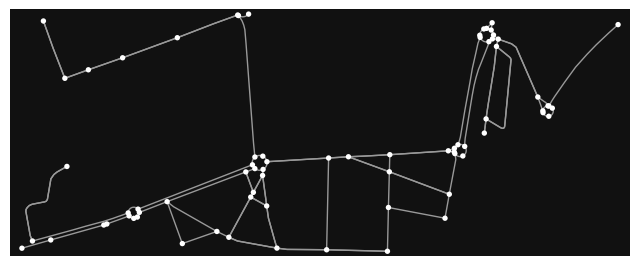

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
min_lat, min_lon, max_lat, max_lon = 34.045, -5.0075, 34.050, -4.990


# Create graph for the new bounding box
graph = create_graph(min_lat,max_lat,min_lon,max_lon)

# Plot the new graph
ox.plot_graph(graph)

<ipython-input-16-05edcafc1a47>:11: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  graph = ox.graph_from_bbox(max_lat, min_lat, max_lon, min_lon, network_type='drive', simplify=False)































(34.05, -4.995)
(34.049, -4.994)
Coordinates with Edges:
[((34.0498086, -4.9955325), (34.0496918, -4.9956726)), ((34.0496918, -4.9956726), (34.0496793, -4.9957425)), ((34.0496793, -4.9957425), (34.049657, -4.995785)), ((34.049657, -4.995785), (34.0496255, -4.995818)), ((34.0496255, -4.995818), (34.0495875, -4.9958387)), ((34.0495875, -4.9958387), (34.0495462, -4.9958455)), ((34.0495462, -4.9958455), (34.0495236, -4.995843)), ((34.0495236, -4.995843), (34.0495016, -4.9958363)), ((34.0495016, -4.9958363), (34.0494526, -4.9958022)), ((34.0494526, -4.9958022), (34.0494183, -4.9957479)), ((34.0494183, -4.9957479), (34.049404, -4.9956818)), ((34.049404, -4.9956818), (34.0494118, -4.9956142)), ((34.0494118, -4.9956142), (34.0494348, -4.9955638)), ((34.0494348, -4.9955638), (34.0494702, -4.9955252)), ((34.0494702, -4.9955252), (34.0495095, -4.995504)), ((34.0495095, -4.995504), (34.0495522, -4.9954979)), ((34.0495522, -4.9954979), (34.0495908, -4.9955057)), ((34.04

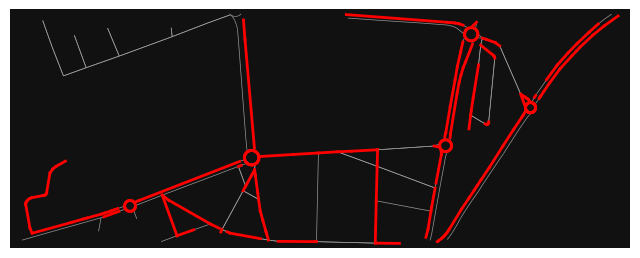

In [ ]:
import numpy as np
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Specify the file path in Google Drive
fichier_osm = '/content/drive/MyDrive/Fes Nodes.osm'

# Create graph for the new bounding box without simplification
min_lat, min_lon, max_lat, max_lon = 34.045, -5.0075, 34.050, -4.990
graph = ox.graph_from_bbox(max_lat, min_lat, max_lon, min_lon, network_type='drive', simplify=False)

# Compute the all-pairs shortest paths using Floyd-Warshall algorithm
result_matrix = nx.floyd_warshall_numpy(graph, weight='length')

# Get the GeoDataFrame of nodes
nodes_gdf = ox.graph_to_gdfs(graph, edges=False)

# Access latitude and longitude columns
latitudes = nodes_gdf['y']
longitudes = nodes_gdf['x']

# Create a list of coordinates from latitude and longitude columns
coords = list(zip(latitudes, longitudes))

# Specify the start and end coordinates
start_coordinates = (34.050, -4.995)
end_coordinates = (34.049, -4.994)

# Use a pathfinding algorithm to find the shortest path based on the result matrix
path_indices = [np.argmin(np.linalg.norm(np.array(coords) - np.array(start_coordinates), axis=1))]

while path_indices[-1] != np.argmin(np.linalg.norm(np.array(coords) - np.array(end_coordinates), axis=1)):
    current_node = path_indices[-1]
    neighbor_distances = result_matrix[current_node, :]

    # Exclude already visited nodes and find the minimum distance neighbor
    valid_neighbors = np.setdiff1d(np.arange(len(coords)), path_indices)
    next_node = valid_neighbors[np.argmin(neighbor_distances[valid_neighbors])]

    path_indices.append(next_node)

# Convert indices to actual nodes in the graph
shortest_path_nodes = nodes_gdf.iloc[path_indices]

# Create a list to store coordinates of nodes with edges between them
coordinates_with_edges = []

# Iterate over the nodes in the shortest path
for u, v in zip(shortest_path_nodes.index[:-1], shortest_path_nodes.index[1:]):
    # Check if there is an edge between nodes u and v
    if graph.has_edge(u, v):
        # Get the coordinates of the nodes u and v
        u_coords = (nodes_gdf.loc[u]['y'], nodes_gdf.loc[u]['x'])
        v_coords = (nodes_gdf.loc[v]['y'], nodes_gdf.loc[v]['x'])
        coordinates_with_edges.append((u_coords, v_coords))
    else:
         #there is no esge between this two nodes
         print();

# Print the list of coordinates with edges between them
print(start_coordinates)
print(end_coordinates)
print("Coordinates with Edges:")
print(coordinates_with_edges)

# Plot the graph using osmnx plot_graph function
ox.plot_graph(graph, node_size=0, edge_linewidth=0.5, show=False, close=False)

# Plot the edges between nodes in red
i = 0

for u, v in coordinates_with_edges:
    x_coords = [u[1], v[1]]
    y_coords = [u[0], v[0]]
    plt.plot(x_coords, y_coords, color='red', linewidth=2)

In [ ]:
import folium
import osmnx as ox
import networkx as nx

place_name = "Fes, Morocco"
graph = ox.graph_from_place(place_name, network_type='all')

max_points = 5
points_printed = 0
M = []

# Ajouter les coordonnées (x, y) et la longueur de l'arête à la liste M
for u, v, data in graph.edges(data=True):
    if points_printed < max_points:
        M.append((graph.nodes[u]['y'], graph.nodes[u]['x'], graph.nodes[v]['y'], graph.nodes[v]['x'], data['length']))
        points_printed += 1
    else:
        break
# Coordonnées des points
points = M

# Création du graphe routier à partir d'une bounding box autour des points
point = (points[0][0], points[0][1])
dist = 40000
graph = ox.graph_from_point(point, network_type='drive', dist=dist)

# Fonction pour retracer le chemin entre deux points
def osmnx_drive_path(graph, start, end):
    # Conversion des coordonnées en nœuds du graphe
    start_node = ox.distance.nearest_nodes(graph, start[1], start[0])
    end_node = ox.distance.nearest_nodes(graph, end[1], end[0])

    # Calcul du plus court chemin pour les voitures
    drive_path = nx.shortest_path(graph, start_node, end_node, weight='length', method='dijkstra')

    # Récupération des coordonnées du chemin
    path_coordinates = [(graph.nodes[node]['y'], graph.nodes[node]['x']) for node in drive_path]

    return path_coordinates

# Création de la carte
m = folium.Map(location=(points[0][0], points[0][1]), zoom_start=12)

# Ajout des points à la carte
for point in points:
    start_point = (point[0], point[1])  # Coordonnées du point de départ
    end_point = (point[2], point[3])    # Coordonnées du point d'arrivée
    folium.Marker(start_point).add_to(m)
    folium.Marker(end_point).add_to(m)
# Récupération du chemin le plus court pour la conduite
start_point = points[0]  # Coordonnées du point de départ
end_point = points[4]    # Coordonnées du point d'arrivée
osmnx_drive_path_coordinates = osmnx_drive_path(graph, start_point, end_point)

# Ajout du chemin à la carte
folium.PolyLine(osmnx_drive_path_coordinates, color="green", weight=2.5, opacity=1).add_to(m)

# Affichage de la carte
m.save("osmnx_drive_path_map.html")
m